In [16]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime

In [21]:
sticky_cards = pd.read_csv('Data/2023_scm_counts.csv')
sticky_cards = clean_columns(sticky_cards)
sticky_cards["date"] = pd.to_datetime(sticky_cards["date"], format="%Y-%m-%d")

In [22]:
overwintering_sites = [
    "EVE_ORC_IN",
    "EVE_ORC_OUT",
    "EVE_FIE_IN",
    "EVE_FIE_OUT",
    "EVE_FOR_IN",
    "EVE_FOR_OUT",
    "KIR_FOR_IN",
    "KIR_FOR_OUT",
    "KIR_ORC_IN",
    "KIR_ORC_OUT",
    'KIR_FIE_IN',
    'KIR_FIE_OUT'
]

kirby = ["KIR_FOR_IN",
    "KIR_FOR_OUT",
    "KIR_ORC_IN",
    "KIR_ORC_OUT",
    'KIR_FIE_IN',
    'KIR_FIE_OUT']

eve = ["EVE_ORC_IN",
    "EVE_ORC_OUT",
    "EVE_FIE_IN",
    "EVE_FIE_OUT",
    "EVE_FOR_IN",
    "EVE_FOR_OUT"]


In [23]:
overwintering = sticky_cards.loc[sticky_cards['site'].isin(overwintering_sites)]
overwintering['total_scm'] = overwintering['n_scm_i_m'] + overwintering['n_scm_o_m'] + overwintering['n_scm_i_f'] + overwintering['n_scm_o_f']
overwintering

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/69414269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overwintering['total_scm'] = overwintering['n_scm_i_m'] + overwintering['n_scm_o_m'] + overwintering['n_scm_i_f'] + overwintering['n_scm_o_f']


,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,...,unnamed_20,unnamed_21,unnamed_22,unnamed_23,unnamed_24,unnamed_25,unnamed_26,unnamed_27,unnamed_28,total_scm
1407,6408,Alexa Stratton,KIR_ORC_IN,2023-08-01,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1408,6409,Alexa Stratton,KIR_ORC_OUT,2023-08-01,1.0,3.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1409,6410,Alexa Stratton,KIR_FIE_IN,2023-08-01,19.0,40.0,2.0,23.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0
1410,6411,Alexa Stratton,KIR_FIE_OUT,2023-08-01,11.0,9.0,10.0,4.0,3.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1415,6416,Alexa Stratton,KIR_FIE_IN,2023-08-08,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,7274,Alexa Stratton,KIR_ORC_IN,2023-11-29,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2274,7275,Alexa Stratton,KIR_FOR_OUT,2023-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2275,7276,Alexa Stratton,KIR_FOR_IN,2023-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2276,7277,Alexa Stratton,KIR_FIE_OUT,2023-11-29,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
for i in range(len(overwintering.index)):
    if 'FIE' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'landscape_type'] = "Field"
    elif 'ORC' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'landscape_type'] = "Orchard"
    elif 'FOR' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'landscape_type'] = "Forest"

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/3074864329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overwintering.loc[overwintering.index[i], 'landscape_type'] = "Orchard"
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/3074864329.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Orchard' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  overwintering.loc[overwintering.index[i], 'landscape_type'] = "Orchard"


In [25]:
for i in range(len(overwintering.index)):
    if 'KIR' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'farm'] = "Kirby"
    elif 'EVE' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'farm'] = "Eve"

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/132017097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overwintering.loc[overwintering.index[i], 'farm'] = "Kirby"
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/132017097.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Kirby' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  overwintering.loc[overwintering.index[i], 'farm'] = "Kirby"


In [26]:
for i in range(len(overwintering.index)):
    if 'IN' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'placement'] = "In"
    elif 'OUT' in overwintering.iloc[i]['site']:
        overwintering.loc[overwintering.index[i], 'placement'] = "Out"

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/3523920498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overwintering.loc[overwintering.index[i], 'placement'] = "In"
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/3523920498.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'In' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  overwintering.loc[overwintering.index[i], 'placement'] = "In"


In [31]:
df = overwintering.groupby(['date', 'farm', 'landscape_type', 'placement'])[['total_scm']].sum()
df


total_scm
date       farm  landscape_type placement           
2023-08-01 Kirby Field          In              84.0
                                Out             34.0
                 Orchard        In               1.0
                                Out              6.0
2023-08-08 Kirby Field          In               1.0
...                                              ...
2023-11-30 Eve   Field          Out              0.0
                 Forest         In               0.0
                                Out              0.0
                 Orchard        In               0.0
                                Out              0.0

[190 rows x 1 columns]

In [32]:
df = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df = df.reset_index(level=1, drop=True).reset_index()
df['date'] = df['date'].dt.date
df['date'] = df['date'].astype('category')
df

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_7463/3304012086.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


,date,farm,landscape_type,placement,total_scm
0,2023-08-01,Kirby,Field,In,67.200000
1,2023-08-01,Kirby,Field,Out,27.200000
2,2023-08-01,Kirby,Orchard,In,0.800000
3,2023-08-01,Kirby,Orchard,Out,4.800000
4,2023-08-08,Kirby,Field,In,3.030303
...,...,...,...,...,...
185,2023-11-30,Eve,Field,Out,0.000000
186,2023-11-30,Eve,Forest,In,0.000000
187,2023-11-30,Eve,Forest,Out,0.000000
188,2023-11-30,Eve,Orchard,In,0.000000


In [28]:
print(sns.color_palette("Set2").as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanq

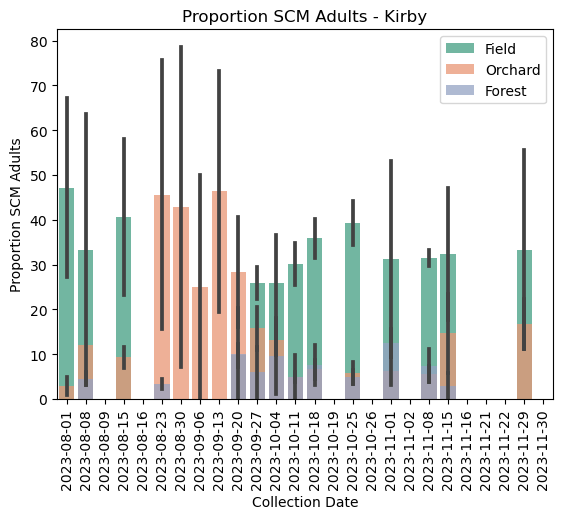

In [34]:
plt.subplots()

ax=sns.barplot(df.loc[(df['farm'] == 'Kirby') & (df['landscape_type'] == 'Field')], x="date", y='total_scm', color='#66c2a5', alpha=1, label='Field')
ax=sns.barplot(df.loc[(df['farm'] == 'Kirby') & (df['landscape_type'] == 'Orchard')], x="date", y='total_scm', color='#fc8d62', alpha=0.75, label='Orchard')
ax=sns.barplot(df.loc[(df['farm'] == 'Kirby') & (df['landscape_type'] == 'Forest')], x="date", y='total_scm', color='#8da0cb', alpha=0.75, label='Forest')

plt.xticks(rotation = 90)

plt.title("Proportion SCM Adults - Kirby")
plt.xlabel("Collection Date")
plt.ylabel("Proportion SCM Adults") 
plt.legend(loc='upper right')

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

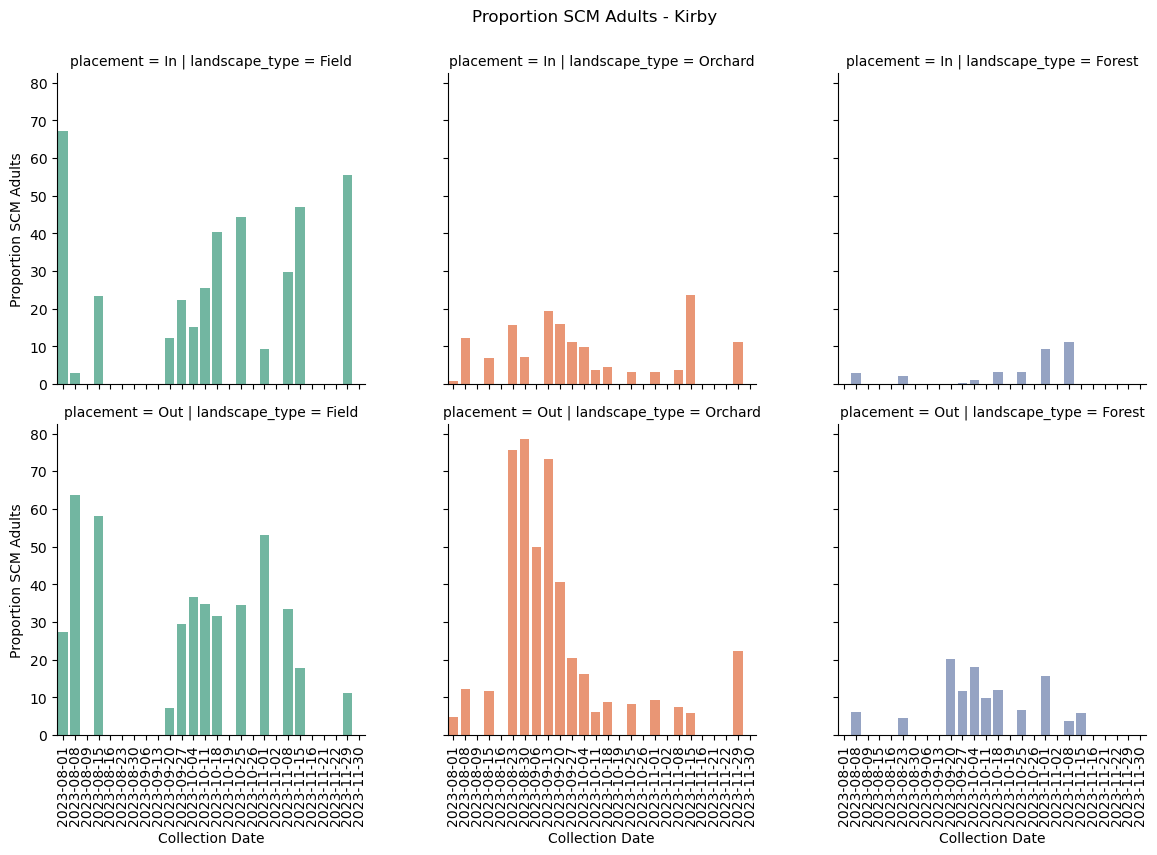

In [35]:
g = sns.FacetGrid(df.loc[(df['farm'] == 'Kirby')], row='placement', col="landscape_type", height=4, aspect=1, hue='landscape_type', hue_order=["Field", "Orchard", "Forest"], palette='Set2')
g.map(sns.barplot, "date", "total_scm", hue_order=["Field", "Orchard", "Forest"])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Proportion SCM Adults - Kirby')
g.set_axis_labels("Collection Date", "Proportion SCM Adults")


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanq

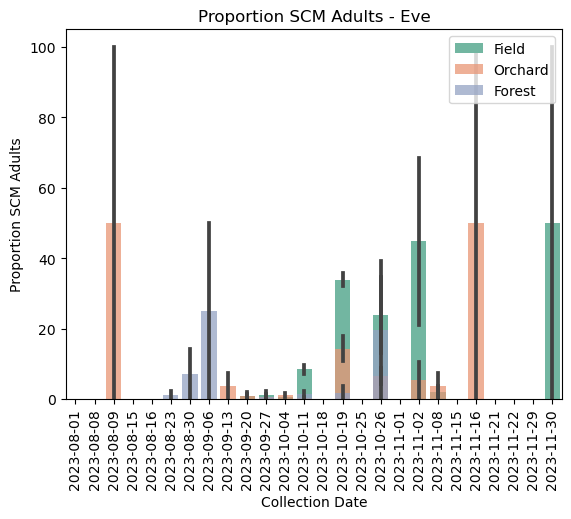

In [36]:
plt.subplots()

ax=sns.barplot(df.loc[(df['farm'] == 'Eve') & (df['landscape_type'] == 'Field')], x="date", y='total_scm', color='#66c2a5', alpha=1, label='Field')
ax=sns.barplot(df.loc[(df['farm'] == 'Eve') & (df['landscape_type'] == 'Orchard')], x="date", y='total_scm', color='#fc8d62', alpha=0.75, label='Orchard')
ax=sns.barplot(df.loc[(df['farm'] == 'Eve') & (df['landscape_type'] == 'Forest')], x="date", y='total_scm', color='#8da0cb', alpha=0.75, label='Forest')

plt.xticks(rotation = 90)

plt.title("Proportion SCM Adults - Eve")
plt.xlabel("Collection Date")
plt.ylabel("Proportion SCM Adults") 
plt.legend(loc='upper right')

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

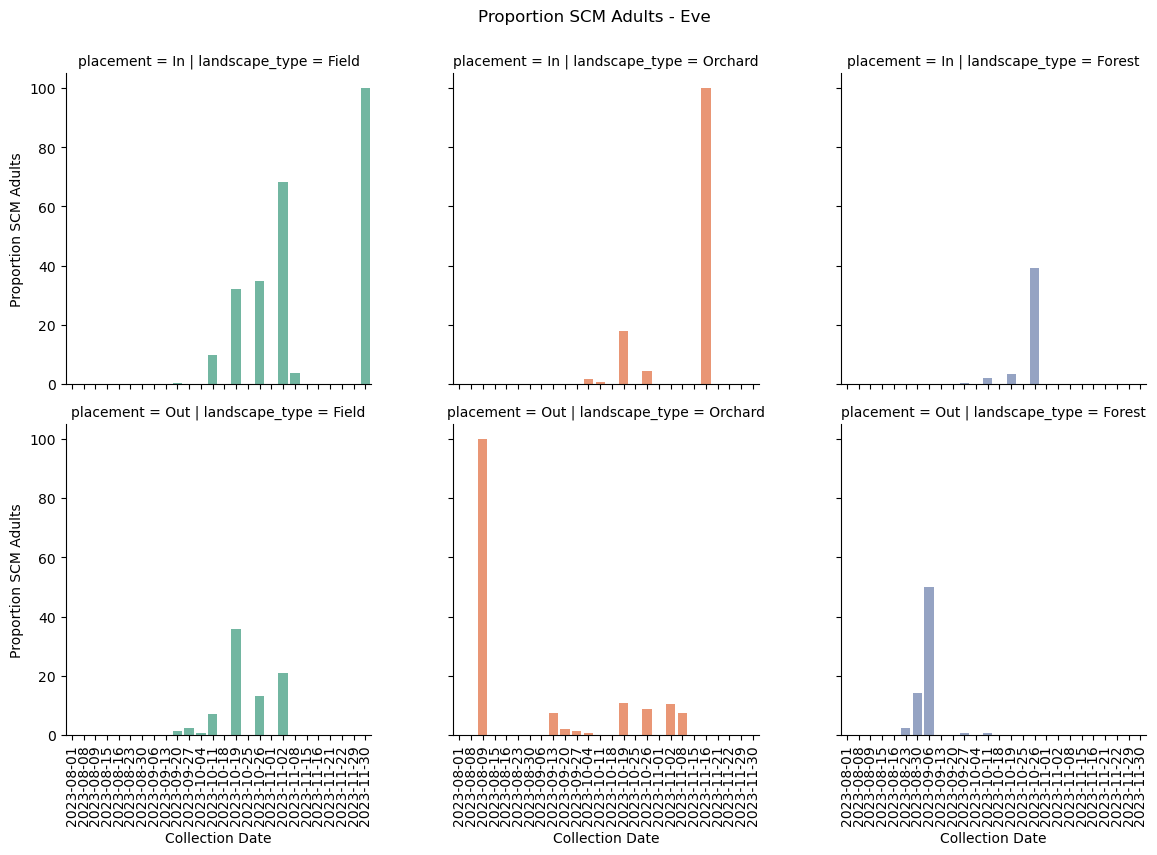

In [37]:
g = sns.FacetGrid(df.loc[(df['farm'] == 'Eve')], row = 'placement', col="landscape_type", height=4, aspect=1, hue='landscape_type', col_order=["Field", "Orchard", "Forest"], hue_order=["Field", "Orchard", "Forest"], palette='Set2')
g.map(sns.barplot, "date", "total_scm", hue_order=["Field", "Orchard", "Forest"])

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Proportion SCM Adults - Eve')
g.set_axis_labels("Collection Date", "Proportion SCM Adults")